In [13]:
import psycopg2
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA: Vitals

## Temperature

In [14]:
chartevents_temp_df = pd.read_csv('../processed_data/chartevents_temp.csv')
chartevents_temp_df = chartevents_temp_df.assign(subgroup=0)

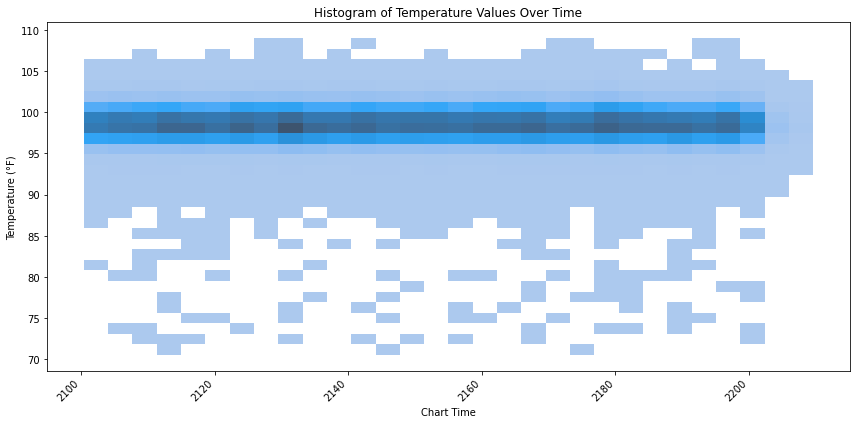

In [15]:
# Convert 'charttime' to datetime format
chartevents_temp_df['charttime'] = pd.to_datetime(chartevents_temp_df['charttime'])
chartevents_temp_df = chartevents_temp_df[(chartevents_temp_df['Final_Temperature_F'] > 70) & (chartevents_temp_df['Final_Temperature_F'] < 110)]

# Set up the plot
plt.figure(figsize=(12, 6))

# Plot the histogram
sns.histplot(x='charttime', y='Final_Temperature_F', data=chartevents_temp_df, kde=True, bins=30)

# Customize plot labels and title
plt.title('Histogram of Temperature Values Over Time')
plt.xlabel('Chart Time')
plt.ylabel('Temperature (°F)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [16]:
subgroup_1_df = pd.read_csv('../processed_data/subgroup_7.csv')
subgroup_1_df['subgroup'] = 1

subgroup_2_df = pd.read_csv('../processed_data/subgroup_5.csv')
subgroup_2_df['subgroup'] = 2

subgroup_3_df = pd.read_csv('../processed_data/subgroup_3.csv')
subgroup_3_df['subgroup'] = 3

subgroup_4_df = pd.read_csv('../processed_data/subgroup_1.csv')
subgroup_4_df['subgroup'] = 4

subgroup_5_df = pd.read_csv('../processed_data/subgroup_4.csv')
subgroup_5_df['subgroup'] = 5

subgroup_6_df = pd.read_csv('../processed_data/subgroup_2.csv')
subgroup_6_df['subgroup'] = 6

subgroup_7_df = pd.read_csv('../processed_data/subgroup_6.csv')
subgroup_7_df['subgroup'] = 7


In [17]:
def merge_temperature_for_subgroup(chartevents_temp_df, subgroup_df, subgroup_number):
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    merged_df = pd.merge(chartevents_temp_df[['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'Final_Temperature_F']],
                        subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup']],
                        on='subject_id', how='inner')

    return merged_df

In [18]:
subgroup_1_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_1_df, 1)
subgroup_2_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_2_df, 2)
subgroup_3_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_3_df, 3)
subgroup_4_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_4_df, 4)
subgroup_5_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_5_df, 5)
subgroup_6_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_6_df, 6)
subgroup_7_temp_df = merge_temperature_for_subgroup(chartevents_temp_df, subgroup_7_df, 7)


In [19]:
filter_condition = (subgroup_1_temp_df['Final_Temperature_F'] > 70) & (subgroup_1_temp_df['Final_Temperature_F'] < 110)
subgroup_1_temp_df = subgroup_1_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_2_temp_df['Final_Temperature_F'] > 70) & (subgroup_2_temp_df['Final_Temperature_F'] < 110)
subgroup_2_temp_df = subgroup_2_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_3_temp_df['Final_Temperature_F'] > 70) & (subgroup_3_temp_df['Final_Temperature_F'] < 110)
subgroup_3_temp_df = subgroup_3_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_4_temp_df['Final_Temperature_F'] > 70) & (subgroup_4_temp_df['Final_Temperature_F'] < 110)
subgroup_4_temp_df = subgroup_4_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_5_temp_df['Final_Temperature_F'] > 70) & (subgroup_5_temp_df['Final_Temperature_F'] < 110)
subgroup_5_temp_df = subgroup_5_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_6_temp_df['Final_Temperature_F'] > 70) & (subgroup_6_temp_df['Final_Temperature_F'] < 110)
subgroup_6_temp_df = subgroup_6_temp_df[filter_condition].reset_index(drop=True)

filter_condition = (subgroup_7_temp_df['Final_Temperature_F'] > 70) & (subgroup_7_temp_df['Final_Temperature_F'] < 110)
subgroup_7_temp_df = subgroup_7_temp_df[filter_condition].reset_index(drop=True)


In [78]:


original_stats = chartevents_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_1_stats = subgroup_1_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_2_stats = subgroup_2_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_3_stats = subgroup_3_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_4_stats = subgroup_4_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_5_stats = subgroup_5_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_6_stats = subgroup_6_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

subgroup_7_stats = subgroup_7_temp_df['Final_Temperature_F'].agg(lambda x: pd.Series({'mean': x.mean(), 'max': x.max(), 'mode': x.mode().iloc[0], 'std': x.std(), 'median': x.median()}))

result_df = pd.DataFrame({
    'Statistic': ['mean', 'max', 'mode', 'std', 'median'],
    'Original Chartevents': original_stats.values,
    'Subgroup 1': subgroup_1_stats.values,
    'Subgroup 2': subgroup_2_stats.values,
    'Subgroup 3': subgroup_3_stats.values,
    'Subgroup 4': subgroup_4_stats.values,
    'Subgroup 5': subgroup_5_stats.values,
    'Subgroup 6': subgroup_6_stats.values,
    'Subgroup 7': subgroup_7_stats.values
})

result_df.set_index('Statistic', inplace=True)

result_df = result_df.round(2)
result_df


,Original Chartevents,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7
Statistic,,,,,,,,
mean,98.61,98.27,98.91,98.40,98.38,98.70,98.29,98.56
max,109.00,106.90,108.14,107.90,107.00,109.00,109.00,109.00
mode,98.60,98.60,98.60,98.60,98.60,98.60,98.60,98.60
std,1.52,1.40,1.56,1.51,1.45,1.45,1.44,1.51
median,98.60,98.20,98.80,98.30,98.30,98.70,98.24,98.50


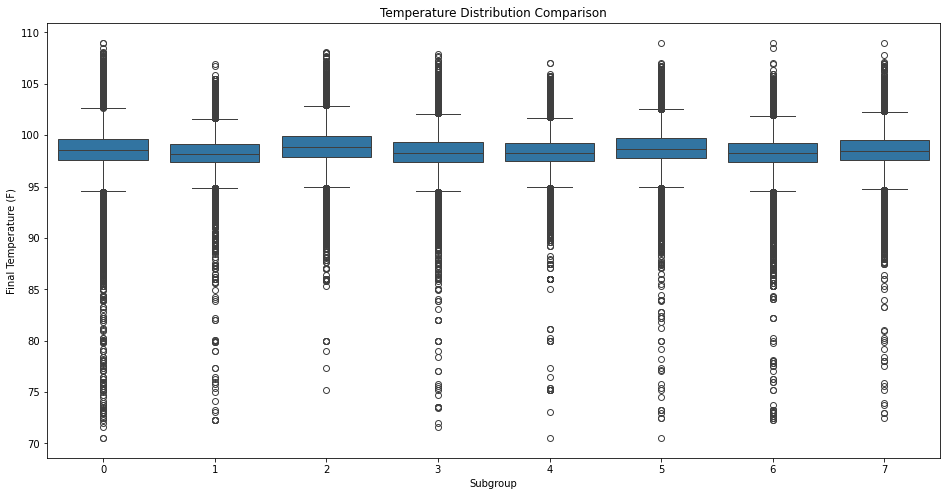

In [21]:
all_subgroups_df = pd.concat([chartevents_temp_df, subgroup_1_temp_df, subgroup_2_temp_df, subgroup_3_temp_df, 
                                subgroup_4_temp_df, subgroup_5_temp_df, subgroup_6_temp_df, subgroup_7_temp_df
                                ], keys=['Original','Subgroup 1', 'Subgroup 2', 'Subgroup 3', 'Subgroup 4', 'Subgroup 5', 'Subgroup 6', 'Subgroup 7'])

# Plot boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(data=all_subgroups_df, x='subgroup', y='Final_Temperature_F')
plt.title('Temperature Distribution Comparison')
plt.xlabel('Subgroup')
plt.ylabel('Final Temperature (F)')
plt.show()



## Respiratory Rate

In [23]:
chartevents_rr_df = pd.read_csv('../processed_data/chartevents_rr.csv')

In [24]:
chartevents_rr_df['RespiratoryRate_combined'].describe()



count    6.263265e+06
mean     2.039807e+01
std      9.412437e+02
min     -1.000000e+00
25%      1.600000e+01
50%      1.900000e+01
75%      2.400000e+01
max      2.355555e+06
Name: RespiratoryRate_combined, dtype: float64

In [25]:
#Fixing negative
index_to_replace = chartevents_rr_df[chartevents_rr_df['RespiratoryRate_combined'] < 0].index[0]
chartevents_rr_df.loc[index_to_replace, 'RespiratoryRate_combined'] = chartevents_rr_df.loc[index_to_replace, 'Respiratory Rate (spontaneous)']

In [26]:
#Finding best value replacement for outlier values 
column_name = 'RespiratoryRate_combined'


Q1 = chartevents_rr_df[column_name].quantile(0.25)
Q3 = chartevents_rr_df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = chartevents_rr_df[(chartevents_rr_df[column_name] < lower_bound) | (chartevents_rr_df[column_name] > upper_bound)]

def get_best_respiratory_rate(row):
    candidate_columns = ['Respiratory Rate', 'Respiratory Rate (Set)', 'Respiratory Rate (Total)']

    best_value = None
    min_difference = float('inf')

    for column in candidate_columns:
        value = row[column]
        if not pd.isnull(value) and 12 <= value <= 22:
            return value
        elif not pd.isnull(value):
            difference = abs(value - 17)  # 17 is the midpoint of the decent human respiratory rate range
            if difference < min_difference:
                min_difference = difference
                best_value = value

    return best_value

outliers['RespiratoryRate_combined'] = outliers.apply(get_best_respiratory_rate, axis=1)

/var/folders/48/vk7lyccx60x4918_6lqc64fw0000gn/T/ipykernel_85910/445750811.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['RespiratoryRate_combined'] = outliers.apply(get_best_respiratory_rate, axis=1)


In [27]:
#Fixing error values leftover 
outliers.loc[outliers['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 10
outliers.loc[outliers['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 10
outliers.loc[outliers['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 100000


In [28]:
outliers['RespiratoryRate_combined'].describe()

count    103441.000000
mean         29.390770
std          18.495647
min           0.000000
25%           2.000000
50%          38.000000
75%          41.000000
max          90.000000
Name: RespiratoryRate_combined, dtype: float64

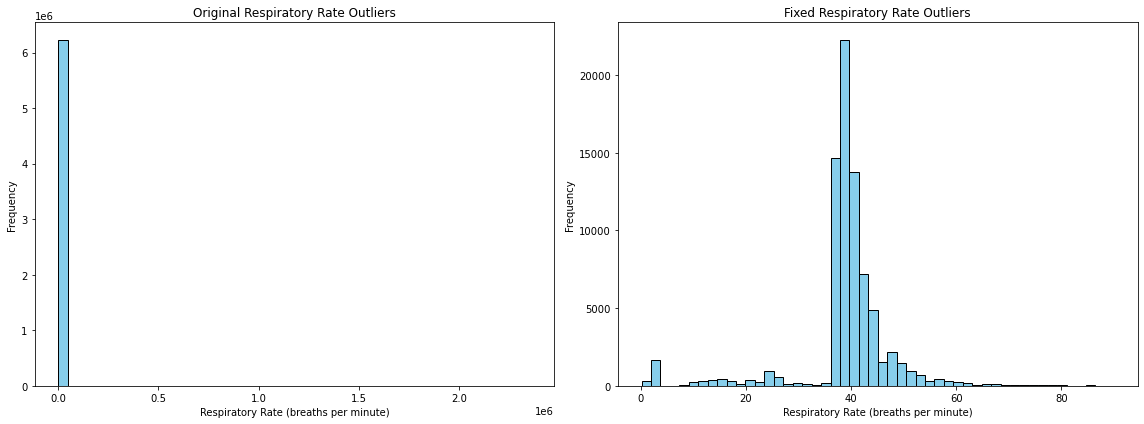

In [29]:
#Visualize outliers before and after
respiratory_rate_column = chartevents_rr_df[chartevents_rr_df['RespiratoryRate_combined'] > 0]['RespiratoryRate_combined'].dropna()
respiratory_rate_column_fixed = outliers[outliers['RespiratoryRate_combined'] > 0]['RespiratoryRate_combined'].dropna()

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(respiratory_rate_column, bins=50, color='skyblue', edgecolor='black')
plt.title('Original Respiratory Rate Outliers')
plt.xlabel('Respiratory Rate (breaths per minute)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(respiratory_rate_column_fixed, bins=50, color='skyblue', edgecolor='black')
plt.title('Fixed Respiratory Rate Outliers')
plt.xlabel('Respiratory Rate (breaths per minute)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [30]:
outliers.set_index(['subject_id', 'hadm_id', 'charttime'], inplace=True)
chartevents_rr_df.set_index(['subject_id', 'hadm_id', 'charttime'], inplace=True)

chartevents_rr_df.update(outliers[['RespiratoryRate_combined']])

chartevents_rr_df.reset_index(inplace=True)

In [31]:
chartevents_rr_df[chartevents_rr_df['RespiratoryRate_combined'] > 90]

,subject_id,hadm_id,charttime,icustay_id,Respiratory Rate,Respiratory Rate (Set),Respiratory Rate (Total),Respiratory Rate (spontaneous),Respiratory Rate Set,RespiratoryRate_combined
100846,801,187764,2197-07-05 19:30:00,283491.0,NaN,NaN,NaN,NaN,120.0,120.0
563720,4785,139435,2199-02-12 20:50:00,262938.0,NaN,NaN,NaN,NaN,123.0,123.0
968957,8132,106508,2177-11-13 06:15:00,247952.0,NaN,NaN,NaN,NaN,110.0,110.0
2504980,21187,118827,2107-10-08 23:02:00,289919.0,NaN,NaN,NaN,NaN,100.0,100.0
2504981,21187,118827,2107-10-09 03:02:00,289919.0,NaN,NaN,NaN,NaN,130.0,130.0
3416498,28801,144188,2173-02-21 16:05:00,288412.0,NaN,NaN,NaN,2423.0,NaN,2423.0
3614537,30509,161350,2113-07-25 13:12:00,251795.0,NaN,NaN,NaN,189.0,NaN,189.0
4463073,54247,171612,2121-07-07 09:00:00,217082.0,NaN,NaN,NaN,315.0,NaN,315.0
4620725,57333,134115,2178-10-13 10:00:00,272679.0,NaN,NaN,NaN,650.0,NaN,650.0
5239414,73611,138998,2183-01-01 08:09:00,215592.0,NaN,NaN,NaN,430.0,NaN,430.0


In [32]:
chartevents_rr_df.loc[chartevents_rr_df['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 10
chartevents_rr_df.loc[chartevents_rr_df['RespiratoryRate_combined'] > 90, 'RespiratoryRate_combined'] /= 10


In [33]:
chartevents_rr_df['RespiratoryRate_combined'].describe()

count    6.263265e+06
mean     2.001401e+01
std      6.209322e+00
min      0.000000e+00
25%      1.600000e+01
50%      1.900000e+01
75%      2.400000e+01
max      9.000000e+01
Name: RespiratoryRate_combined, dtype: float64

In [34]:
def merge_respiratory_to_subgroup(respiratory_df, subgroup_df):
    respiratory_df['charttime'] = pd.to_datetime(respiratory_df['charttime'])
    
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    filtered_respiratory_df = respiratory_df[respiratory_df['subject_id'].isin(subgroup_df['subject_id'])]

    merged_df = pd.merge(filtered_respiratory_df[['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'RespiratoryRate_combined']],
                        subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup']],
                        on='subject_id', how='outer')

    return merged_df

In [35]:
subgroup_1_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_1_df)
subgroup_2_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_2_df)
subgroup_3_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_3_df)
subgroup_4_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_4_df)
subgroup_5_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_5_df)
subgroup_6_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_6_df)
subgroup_7_rr_df = merge_respiratory_to_subgroup(chartevents_rr_df, subgroup_7_df)


In [36]:
subgroup_1_rr_df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'charttime',
       'RespiratoryRate_combined', 'rounded_age', 'admission_type_encoded',
       'subgroup'],
      dtype='object')

In [37]:
chartevents_rr_df.columns

Index(['subject_id', 'hadm_id', 'charttime', 'icustay_id', 'Respiratory Rate',
       'Respiratory Rate (Set)', 'Respiratory Rate (Total)',
       'Respiratory Rate (spontaneous)', 'Respiratory Rate Set',
       'RespiratoryRate_combined'],
      dtype='object')

In [79]:
resp_dfs = [subgroup_1_rr_df,
            subgroup_2_rr_df,
            subgroup_3_rr_df,
            subgroup_4_rr_df,
            subgroup_5_rr_df,
            subgroup_6_rr_df,
            subgroup_7_rr_df]


def calculate_stats(df):
    return df['RespiratoryRate_combined'].agg(lambda x: pd.Series({
        'mean': x.mean(),
        'max': x.max(),
        'mode': x.mode().iloc[0],
        'std': x.std(),
        'median': x.median()
    }))

resp_stats_list = []

for i, df in enumerate(resp_dfs):
    subgroup_stats = calculate_stats(df)
    resp_stats_list.append(subgroup_stats)

result_resp_df = pd.DataFrame(resp_stats_list, index=[f'Subgroup {i + 1}' for i in range(len(resp_dfs))])

result_resp_df.loc['Original Chartevents'] = calculate_stats(chartevents_rr_df)

result_resp_df = result_resp_df.transpose()

result_resp_df.round(2)


,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7,Original Chartevents
mean,20.25,19.55,19.98,18.81,19.77,20.48,20.29,20.01
max,90.00,89.00,90.00,88.00,90.00,90.00,90.00,90.00
mode,20.00,16.00,18.00,16.00,18.00,20.00,20.00,18.00
std,5.94,6.46,6.31,5.85,6.19,6.05,6.45,6.21
median,20.00,19.00,19.00,18.00,19.00,20.00,20.00,19.00


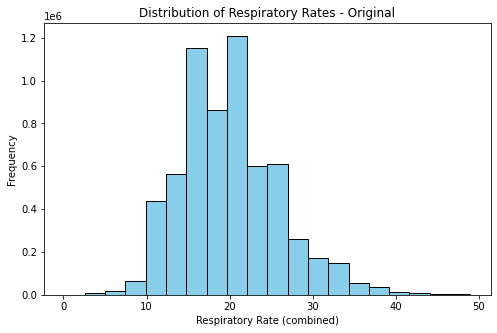

In [40]:
original_data = chartevents_rr_df['RespiratoryRate_combined'].dropna().tolist()
original_data = [value for value in original_data if 0 < value < 50]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Respiratory Rates - Original')
plt.xlabel('Respiratory Rate (combined)')
plt.ylabel('Frequency')
plt.show()

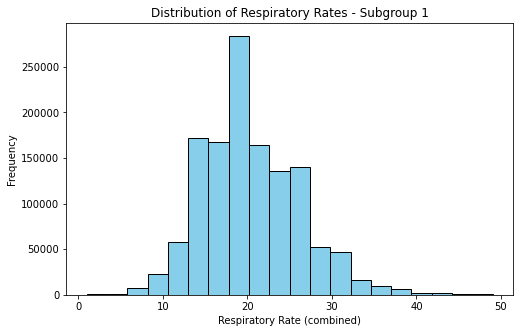

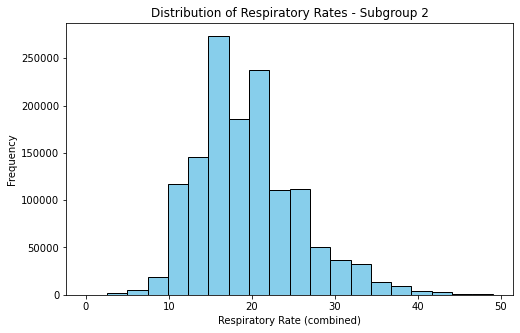

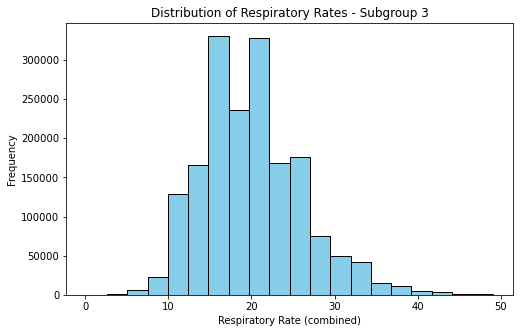

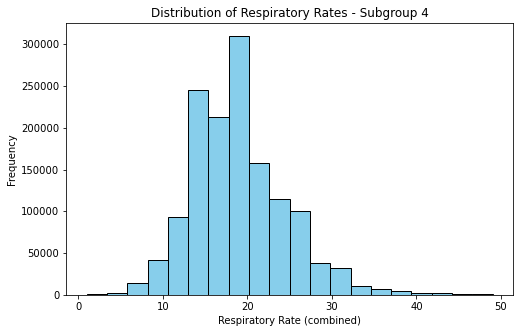

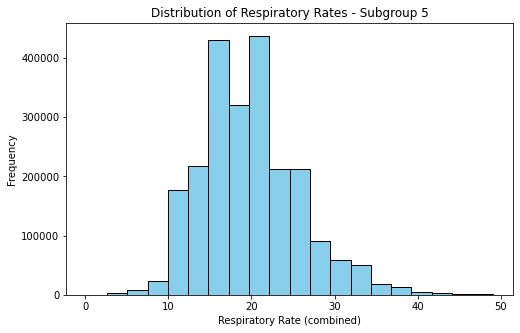

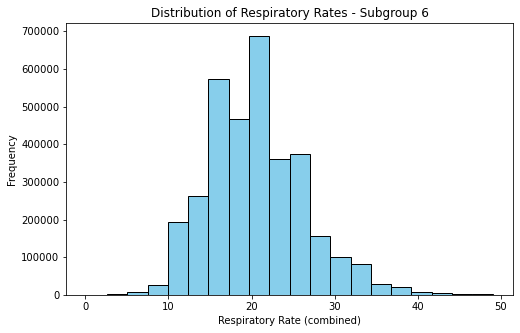

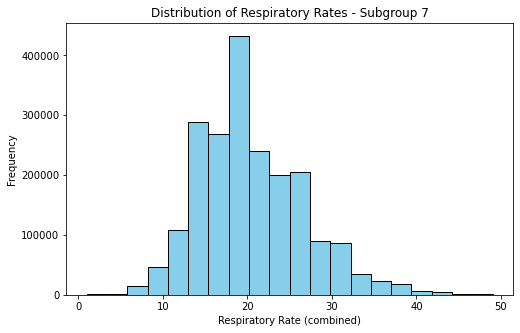

In [42]:
subgroups = [subgroup_1_rr_df, subgroup_2_rr_df, subgroup_3_rr_df,
             subgroup_4_rr_df, subgroup_5_rr_df, subgroup_6_rr_df, subgroup_7_rr_df]


for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['RespiratoryRate_combined'].dropna().tolist()
    filtered_data = [value for value in filtered_data if 0 < value < 50]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Respiratory Rates - Subgroup {i + 1}')
    plt.xlabel('Respiratory Rate (combined)')
    plt.ylabel('Frequency')
    plt.show()


## Blood Pressure 

In [133]:
chartevents_bp_df = pd.read_csv('../processed_data/chartevents_bp.csv')

In [134]:
chartevents_bp_df


,subject_id,hadm_id,icustay_id,charttime,Arterial BP #2 [Systolic],Arterial BP [Systolic],Arterial Blood Pressure systolic,Manual BP [Systolic],NBP [Systolic],Non Invasive Blood Pressure systolic,BP_combined,Combined_Blood_Pressure_Systolic,Combined_Blood_Pressure
0,3,145834,211552.0,2101-10-20 18:45:00,NaN,NaN,NaN,NaN,62.0,NaN,62.0,62.0,62.0
1,3,145834,211552.0,2101-10-20 19:00:00,NaN,NaN,NaN,NaN,66.0,NaN,66.0,66.0,66.0
2,3,145834,211552.0,2101-10-20 19:15:00,NaN,0.0,NaN,NaN,217.0,NaN,0.0,0.0,0.0
3,3,145834,211552.0,2101-10-20 19:30:00,NaN,NaN,NaN,NaN,102.0,NaN,102.0,102.0,102.0
4,3,145834,211552.0,2101-10-20 19:45:00,NaN,NaN,NaN,NaN,94.0,NaN,94.0,94.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784416,99999,113369,246512.0,2117-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,133.0,133.0,133.0,133.0
5784417,99999,113369,246512.0,2117-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,128.0,128.0,128.0,128.0
5784418,99999,113369,246512.0,2118-01-01 00:01:00,NaN,NaN,NaN,NaN,NaN,139.0,139.0,139.0,139.0
5784419,99999,113369,246512.0,2117-12-31 11:59:00,NaN,NaN,NaN,NaN,NaN,125.0,125.0,125.0,125.0


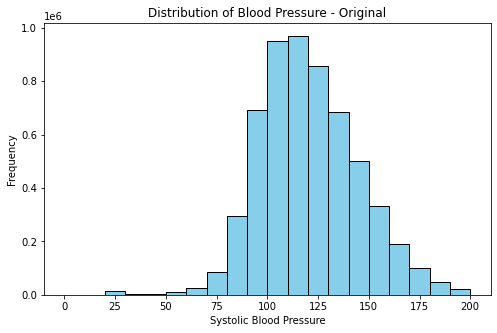

In [150]:
original_data = chartevents_bp_df['Combined_Blood_Pressure'].dropna().tolist()
original_data = [value for value in original_data if 0 < value < 300]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Blood Pressure - Original')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')
plt.show()

In [143]:
outliers = chartevents_bp_df[chartevents_bp_df['Combined_Blood_Pressure'] > 1000]

def convert_to_hundreds_version(column):
    def convert(x):
        if x == 0:
            return 0
        length = len(str(int(x)))
        if length <= 3:
            return x / 10 ** (length - 3)
        elif length <= 4:
            return x / 10 ** 1
        elif length <= 5:
            return x / 10 ** 2
        elif length <= 6:
            return x / 10 ** 3
        else:
            return x / 10 ** 4
    return column.apply(convert)




to_fix = convert_to_hundreds_version(outliers.Combined_Blood_Pressure)
to_fix = to_fix.apply(lambda x: x / 10 if x > 200 else x)

outliers['Combined_Blood_Pressure'] = to_fix
outliers



/var/folders/48/vk7lyccx60x4918_6lqc64fw0000gn/T/ipykernel_85910/2706379025.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['Combined_Blood_Pressure'] = to_fix


,subject_id,hadm_id,icustay_id,charttime,Arterial BP #2 [Systolic],Arterial BP [Systolic],Arterial Blood Pressure systolic,Manual BP [Systolic],NBP [Systolic],Non Invasive Blood Pressure systolic,BP_combined,Combined_Blood_Pressure_Systolic,Combined_Blood_Pressure,combined_key
2571346,22122,117059,289641.0,2172-03-11 11:00:00,NaN,NaN,NaN,NaN,NaN,141146.04,141146.04,141146.04,141.14604,"(22122, 2172-03-11 11:00:00, 117059, 289641.0)"
2732229,23546,108640,203781.0,2195-08-02 11:00:00,NaN,NaN,NaN,NaN,NaN,10342.00,10342.00,10342.00,103.42000,"(23546, 2195-08-02 11:00:00, 108640, 203781.0)"
2859680,24785,124880,212120.0,2167-11-06 17:00:00,NaN,NaN,NaN,NaN,NaN,101110.02,101110.02,101110.02,101.11002,"(24785, 2167-11-06 17:00:00, 124880, 212120.0)"
3185649,27397,143435,271949.0,2166-08-22 12:00:00,NaN,NaN,14868.00,NaN,NaN,NaN,14868.00,14868.00,148.68000,"(27397, 2166-08-22 12:00:00, 143435, 271949.0)"
4065957,48660,184168,255597.0,2130-11-24 09:00:00,NaN,NaN,87117.97,NaN,NaN,NaN,87117.97,87117.97,87.11797,"(48660, 2130-11-24 09:00:00, 184168, 255597.0)"
4181062,52012,146937,234508.0,2162-10-16 17:00:00,NaN,NaN,NaN,NaN,NaN,11676.00,11676.00,11676.00,116.76000,"(52012, 2162-10-16 17:00:00, 146937, 234508.0)"
4233740,53782,190648,246339.0,2101-10-31 06:00:00,NaN,NaN,13575.00,NaN,NaN,NaN,13575.00,13575.00,135.75000,"(53782, 2101-10-31 06:00:00, 190648, 246339.0)"
4295428,55201,142001,242452.0,2201-05-18 14:30:00,NaN,NaN,NaN,NaN,NaN,72122.00,72122.00,72122.00,72.12200,"(55201, 2201-05-18 14:30:00, 142001, 242452.0)"
4443979,58593,199515,265817.0,2164-04-09 12:00:00,NaN,NaN,NaN,NaN,NaN,116116.00,116116.00,116116.00,116.11600,"(58593, 2164-04-09 12:00:00, 199515, 265817.0)"
4540604,61157,131297,226901.0,2175-05-07 09:00:00,NaN,NaN,NaN,NaN,NaN,13756.00,13756.00,13756.00,137.56000,"(61157, 2175-05-07 09:00:00, 131297, 226901.0)"


In [144]:
# Create a combined key in both DataFrames
chartevents_bp_df['combined_key'] = chartevents_bp_df[['subject_id', 'charttime', 'hadm_id', 'icustay_id']].apply(tuple, axis=1)
outliers['combined_key'] = outliers[['subject_id', 'charttime', 'hadm_id', 'icustay_id']].apply(tuple, axis=1)

# Create a mapping from the combined key to the Combined_Blood_Pressure in the outliers DataFrame
outlier_mapping = outliers.set_index('combined_key')['Combined_Blood_Pressure'].to_dict()


/var/folders/48/vk7lyccx60x4918_6lqc64fw0000gn/T/ipykernel_85910/949089218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['combined_key'] = outliers[['subject_id', 'charttime', 'hadm_id', 'icustay_id']].apply(tuple, axis=1)


In [145]:
# Map the combined key in chartevents_bp_df to the outlier values
chartevents_bp_df['Combined_Blood_Pressure'] = chartevents_bp_df['combined_key'].map(outlier_mapping).fillna(chartevents_bp_df['Combined_Blood_Pressure'])

# Drop the combined_key column as it's no longer needed
chartevents_bp_df.drop(columns=['combined_key'], inplace=True)


In [146]:
chartevents_bp_df["Combined_Blood_Pressure"] = chartevents_bp_df['Combined_Blood_Pressure'].apply(
    lambda x: x/10 if x > 200 else x
)

In [147]:
def merge_blood_pressure_to_subgroup(bp_df, subgroup_df):
    bp_df['charttime'] = pd.to_datetime(bp_df['charttime'])

    # Drop the existing 'level_0' column if it exists
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    # Filter bp_df to include only rows where subject_id is in subgroup_df
    filtered_bp_df = bp_df[bp_df['subject_id'].isin(subgroup_df['subject_id'])]

    # Merge without including 'charttime'
    merged_df = pd.merge(filtered_bp_df[['subject_id', 'hadm_id', 'icustay_id', 'charttime', 'Combined_Blood_Pressure']],
                        subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup']],
                        on='subject_id', how='outer')
    return merged_df

In [148]:
subgroup_1_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_1_df)
subgroup_2_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_2_df)
subgroup_3_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_3_df)
subgroup_4_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_4_df)
subgroup_5_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_5_df)
subgroup_6_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_6_df)
subgroup_7_bp_df = merge_blood_pressure_to_subgroup(chartevents_bp_df, subgroup_7_df)

In [149]:
bp_dfs = [subgroup_1_bp_df,
            subgroup_2_bp_df,
            subgroup_3_bp_df,
            subgroup_4_bp_df,
            subgroup_5_bp_df,
            subgroup_6_bp_df,
            subgroup_7_bp_df]


def calculate_stats(df):
    return df['Combined_Blood_Pressure'].agg(lambda x: pd.Series({
        'mean': x.mean(),
        'max': x.max(),
        'mode': x.mode().iloc[0],
        'std': x.std(),
        'median': x.median()
    }))

bp_stats_list = []

for i, df in enumerate(bp_dfs):
    subgroup_stats = calculate_stats(df)
    bp_stats_list.append(subgroup_stats)

result_bp_df = pd.DataFrame(bp_stats_list, index=[f'Subgroup {i + 1}' for i in range(len(bp_dfs))])

result_bp_df.loc['Original Chartevents'] = calculate_stats(chartevents_bp_df)

result_bp_df = result_bp_df.transpose()


# result_df.loc['max'] = (result_df.loc['max'])/10000

result_bp_df.round(2)

,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7,Original Chartevents
mean,118.08,121.35,119.43,126.35,121.22,118.03,123.12,120.84
max,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mode,105.00,110.00,110.00,110.00,110.00,110.00,112.00,110.00
std,24.20,24.36,24.32,29.14,24.19,24.10,25.84,24.57
median,115.00,119.00,117.00,125.00,119.00,115.00,121.00,119.00


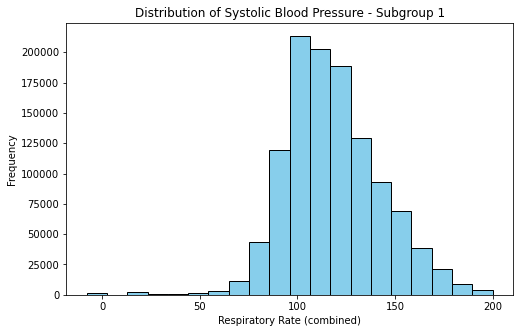

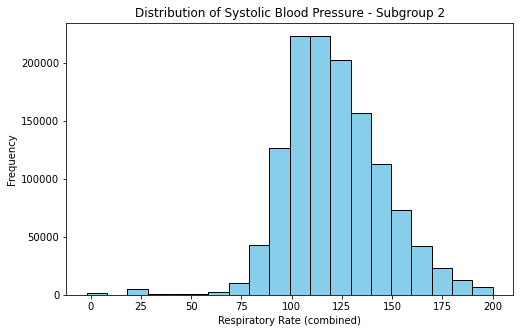

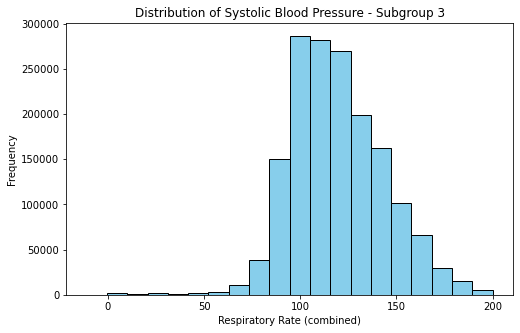

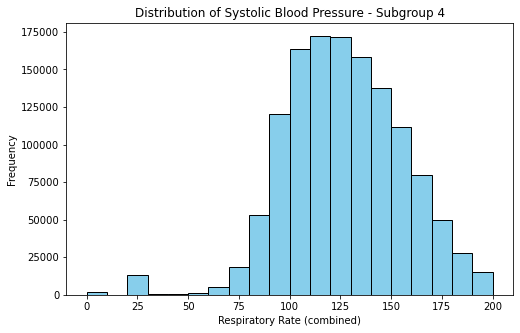

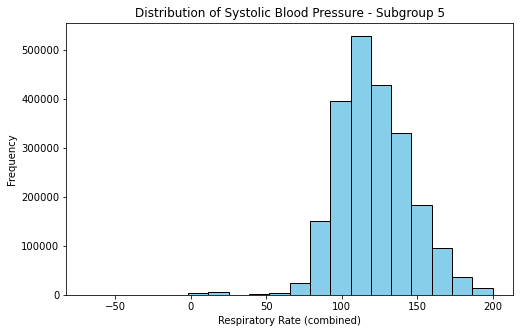

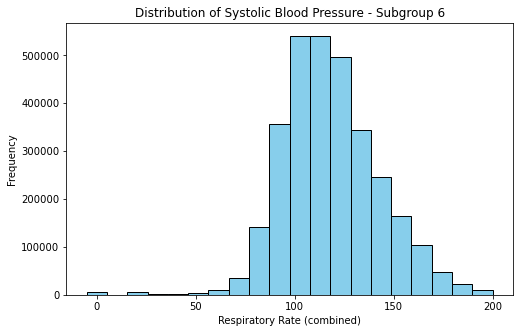

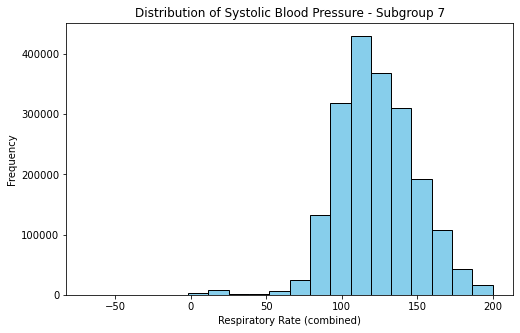

In [151]:
subgroups = [subgroup_1_bp_df, subgroup_2_bp_df, subgroup_3_bp_df,
             subgroup_4_bp_df, subgroup_5_bp_df, subgroup_6_bp_df, subgroup_7_bp_df]

for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['Combined_Blood_Pressure'].dropna().tolist()
    filtered_data = [value for value in filtered_data if value < 300]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Systolic Blood Pressure - Subgroup {i + 1}')
    plt.xlabel('Respiratory Rate (combined)')
    plt.ylabel('Frequency')
    plt.show()

## Heart Rate

In [152]:
chartevents_hr_df = pd.read_csv('../processed_data/chartevents_hr.csv')

In [154]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300]

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High
580771,3235,175562,220995.0,2143-01-08 15:55:00,303.0,NaN,NaN
1521794,8533,152254,274086.0,2142-03-13 07:00:00,6632.0,NaN,NaN
4550793,25941,102600,270205.0,2191-06-11 00:37:00,900.0,NaN,NaN
5816304,45709,169409,287061.0,2144-12-03 07:07:00,941.0,NaN,NaN
5891204,47240,167812,274340.0,2153-08-10 07:00:00,5409.0,NaN,NaN
5934975,48220,108153,214944.0,2115-10-29 04:00:00,86101.0,NaN,NaN
6096669,51931,169190,289346.0,2186-05-25 06:55:00,770.0,NaN,NaN
6512670,60548,159650,232723.0,2109-11-13 17:06:00,880.0,NaN,NaN
6751591,67206,174522,210772.0,2129-09-21 11:38:00,459.0,NaN,NaN
7255785,80927,179544,252668.0,2155-06-08 01:00:00,11710.0,NaN,NaN


In [168]:
chartevents_hr_df.loc[chartevents_hr_df['Heart Rate'] > 300, 'Heart Rate'] /= 10


In [169]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300]

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High


In [157]:
chartevents_hr_df.loc[chartevents_hr_df['Heart Rate'] > 300, 'Heart Rate'] /= 10

In [158]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300]

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High
5934975,48220,108153,214944.0,2115-10-29 04:00:00,861.01,NaN,NaN
7764956,92373,130520,256824.0,2194-08-14 16:45:00,99999.99,NaN,NaN


In [170]:
chartevents_hr_df.loc[chartevents_hr_df['Heart Rate'] > 300, 'Heart Rate'] /= 10

In [171]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300]

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High


In [172]:
chartevents_hr_df.loc[chartevents_hr_df['Heart Rate'] > 300, 'Heart Rate'] /= 10

In [173]:
chartevents_hr_df[chartevents_hr_df['Heart Rate'] > 300] 

,subject_id,hadm_id,icustay_id,charttime,Heart Rate,Heart Rate Alarm - Low,Heart rate Alarm - High


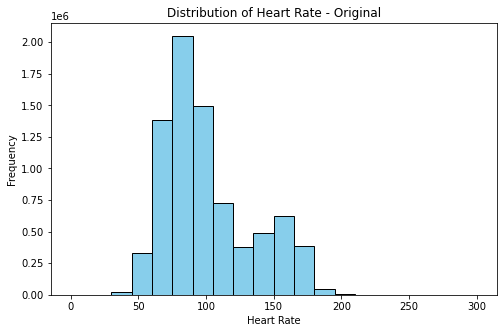

In [174]:
original_data = chartevents_hr_df['Heart Rate'].dropna().tolist()
original_data = [value for value in original_data if 0 < value]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Heart Rate - Original')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [175]:
def merge_heart_rate_to_subgroup(hr_df, subgroup_df):
    hr_df['charttime'] = pd.to_datetime(hr_df['charttime'])

    # Drop the existing 'level_0' column if it exists
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    # Filter hr_df to include only rows where subject_id and hadm_id are in subgroup_df
    filtered_hr_df = hr_df[(hr_df['subject_id'].isin(subgroup_df['subject_id'])) & (hr_df['hadm_id'].isin(subgroup_df['hadm_id']))]

    # Merge without including 'charttime'
    merged_df = pd.merge(subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup', 'hadm_id']],
                        filtered_hr_df[['subject_id', 'hadm_id', 'icustay_id', 'Heart Rate', 'charttime']],
                        on=['subject_id', 'hadm_id'], how='outer')
    return merged_df

In [176]:
subgroup_1_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_1_df)
subgroup_2_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_2_df)
subgroup_3_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_3_df)
subgroup_4_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_4_df)
subgroup_5_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_5_df)
subgroup_6_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_6_df)
subgroup_7_hr_df = merge_heart_rate_to_subgroup(chartevents_hr_df, subgroup_7_df)

In [177]:
hr_dfs = [subgroup_1_hr_df,
            subgroup_2_hr_df,
            subgroup_3_hr_df,
            subgroup_4_hr_df,
            subgroup_5_hr_df,
            subgroup_6_hr_df,
            subgroup_7_hr_df]


def calculate_stats(df):
    return df['Heart Rate'].agg(lambda x: pd.Series({
        'mean': x.mean(),
        'max': x.max(),
        'mode': x.mode().iloc[0],
        'std': x.std(),
        'median': x.median()
    }))

hr_stats_list = []

for i, df in enumerate(hr_dfs):
    subgroup_stats = calculate_stats(df)
    hr_stats_list.append(subgroup_stats)

result_hr_df = pd.DataFrame(hr_stats_list, index=[f'Subgroup {i + 1}' for i in range(len(hr_dfs))])

result_hr_df.loc['Original Chartevents'] = calculate_stats(chartevents_hr_df)

result_hr_df = result_hr_df.transpose()


# result_df.loc['max'] = (result_df.loc['max'])/10000

result_hr_df.round(2)

,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7,Original Chartevents
mean,85.57,91.19,92.04,84.59,85.23,86.00,87.28,101.38
max,256.00,223.00,245.00,240.00,300.00,300.00,300.00,300.00
mode,70.00,88.00,90.00,80.00,80.00,80.00,80.00,80.00
std,18.24,19.90,19.34,16.84,16.78,18.13,17.85,32.84
median,84.00,91.00,91.00,84.00,84.00,84.00,86.00,92.00


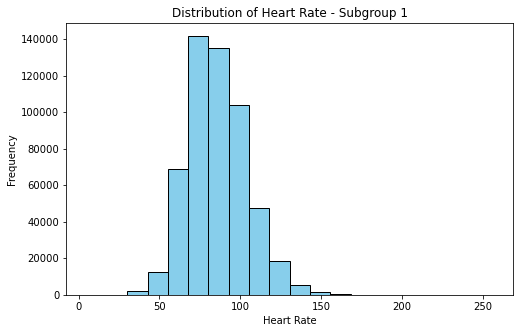

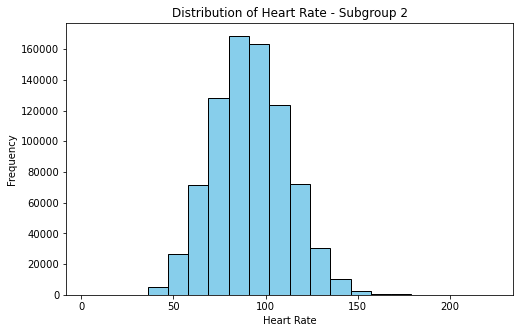

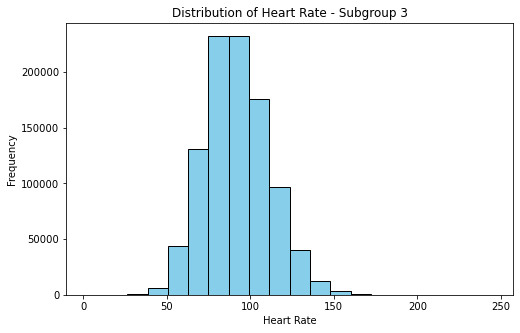

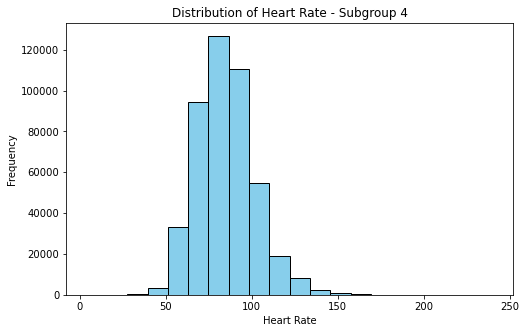

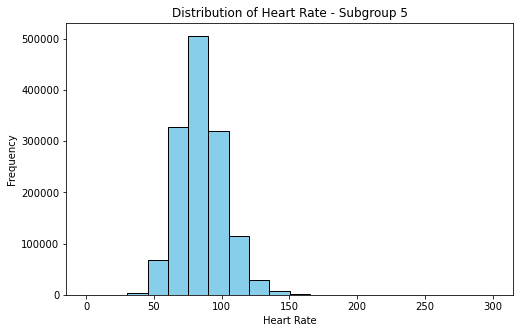

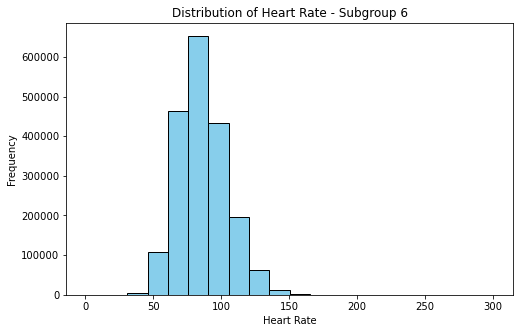

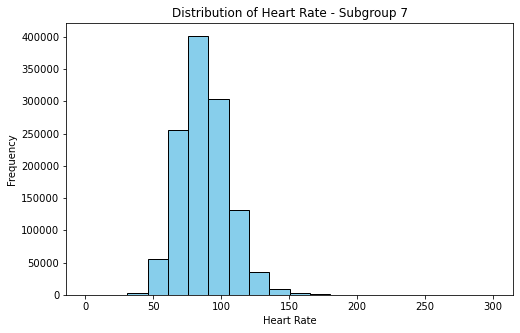

In [178]:
subgroups = [subgroup_1_hr_df, subgroup_2_hr_df, subgroup_3_hr_df,
             subgroup_4_hr_df, subgroup_5_hr_df, subgroup_6_hr_df, subgroup_7_hr_df]

for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['Heart Rate'].dropna().tolist()
    filtered_data = [value for value in filtered_data if 0 < value]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Heart Rate - Subgroup {i + 1}')
    plt.xlabel('Heart Rate')
    plt.ylabel('Frequency')
    plt.show()

## Oxygen Saturation

In [179]:
chartevents_o2sat_df = pd.read_csv('../processed_data/chartevents_o2sat.csv')

In [180]:
chartevents_o2sat_df[chartevents_o2sat_df['SpO2'] < 10]

,subject_id,hadm_id,icustay_id,charttime,SpO2
4122,68,108329,272667.0,2174-01-10 19:00:00,0.0
4123,68,108329,272667.0,2174-01-10 21:00:00,0.0
4128,68,108329,272667.0,2174-01-11 02:00:00,0.0
4845,91,121205,256972.0,2177-05-10 14:00:00,0.0
4846,91,121205,256972.0,2177-05-10 14:05:00,0.0
...,...,...,...,...,...
3375397,32443,184083,223654.0,2161-03-26 02:45:00,0.0
3379470,32488,137459,249558.0,2199-10-01 12:25:00,0.0
3389056,32611,141765,276974.0,2192-07-08 03:00:00,7.0
3392897,32658,182532,255383.0,2143-05-27 19:00:00,0.0


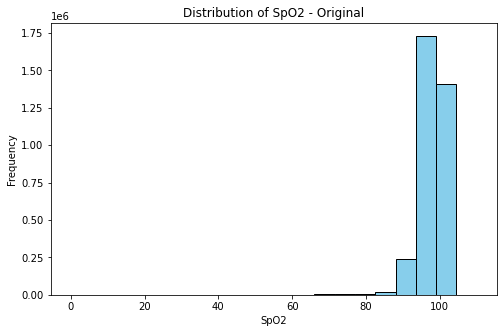

In [181]:
original_data = chartevents_o2sat_df['SpO2'].tolist()
# original_data = [value for value in original_data if 80 < value]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of SpO2 - Original')
plt.xlabel('SpO2')
plt.ylabel('Frequency')
plt.show()

In [183]:
def merge_oxygen_saturation_to_subgroup(o2sat_df, subgroup_df):
    o2sat_df['charttime'] = pd.to_datetime(o2sat_df['charttime'])

    
    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)

    subgroup_df.reset_index(inplace=True)

    filtered_o2sat_df = o2sat_df[(o2sat_df['subject_id'].isin(subgroup_df['subject_id'])) & (o2sat_df['hadm_id'].isin(subgroup_df['hadm_id']))]

    merged_df = pd.merge(subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup', 'hadm_id']],
                        filtered_o2sat_df[['subject_id', 'hadm_id', 'icustay_id', 'SpO2', 'charttime']],
                        on=['subject_id', 'hadm_id'], how='outer')
    return merged_df


In [184]:
subgroup_1_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_1_df)
subgroup_2_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_2_df)
subgroup_3_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_3_df)
subgroup_4_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_4_df)
subgroup_5_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_5_df)
subgroup_6_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_6_df)
subgroup_7_o2sat_df = merge_oxygen_saturation_to_subgroup(chartevents_o2sat_df, subgroup_7_df)

In [186]:
o2sat_dfs = [subgroup_1_o2sat_df,
            subgroup_2_o2sat_df,
            subgroup_3_o2sat_df,
            subgroup_4_o2sat_df,
            subgroup_5_o2sat_df,
            subgroup_6_o2sat_df,
            subgroup_7_o2sat_df]


def calculate_stats(df):
    return df['SpO2'].agg(lambda x: pd.Series({
        'mean': x.mean(),
        'max': x.max(),
        'mode': x.mode().iloc[0],
        'std': x.std(),
        'median': x.median()
    }))

o2sat_stats_list = []

for i, df in enumerate(o2sat_dfs):
    subgroup_stats = calculate_stats(df)
    o2sat_stats_list.append(subgroup_stats)

result_o2sat_df = pd.DataFrame(o2sat_stats_list, index=[f'Subgroup {i + 1}' for i in range(len(o2sat_dfs))])

result_o2sat_df.loc['Original Chartevents'] = calculate_stats(chartevents_o2sat_df)

result_o2sat_df = result_hr_df.transpose()


# result_df.loc['max'] = (result_df.loc['max'])/10000

result_hr_df.round(2)

,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7,Original Chartevents
mean,85.57,91.19,92.04,84.59,85.23,86.00,87.28,101.38
max,256.00,223.00,245.00,240.00,300.00,300.00,300.00,300.00
mode,70.00,88.00,90.00,80.00,80.00,80.00,80.00,80.00
std,18.24,19.90,19.34,16.84,16.78,18.13,17.85,32.84
median,84.00,91.00,91.00,84.00,84.00,84.00,86.00,92.00


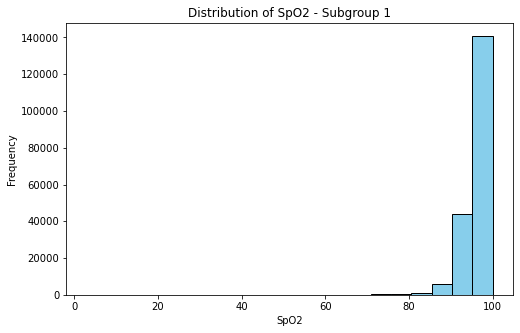

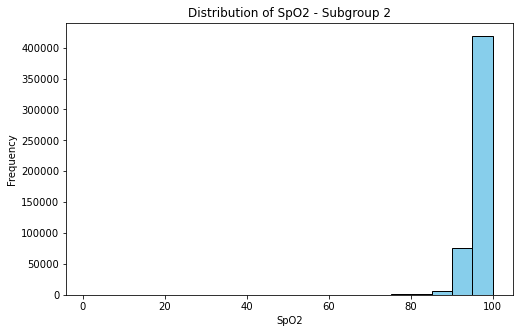

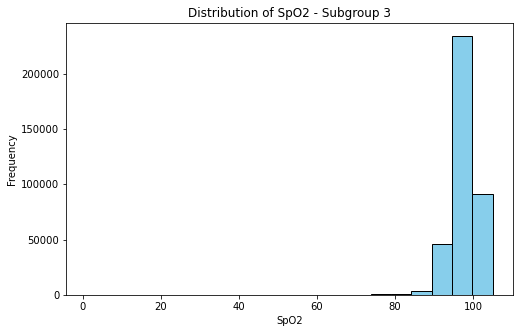

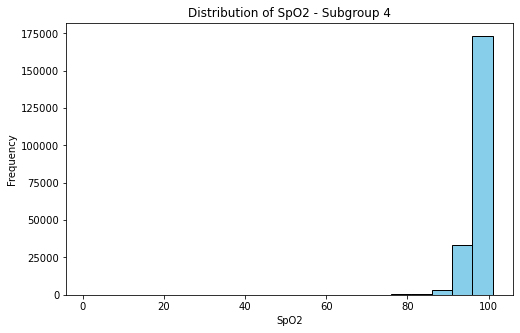

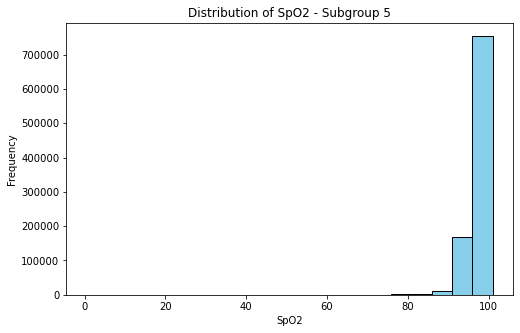

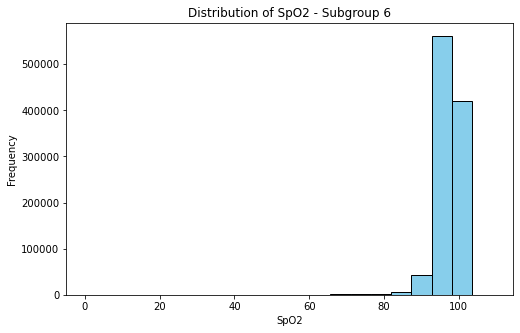

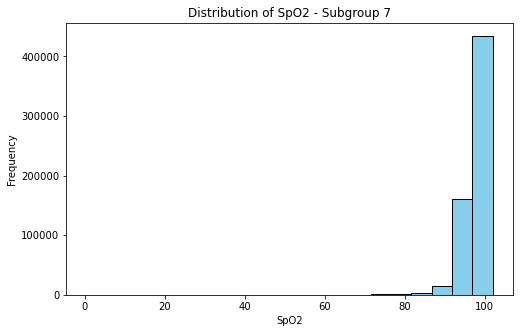

In [187]:
subgroups = [subgroup_1_o2sat_df, subgroup_2_o2sat_df, subgroup_3_o2sat_df,
             subgroup_4_o2sat_df, subgroup_5_o2sat_df, subgroup_6_o2sat_df, subgroup_7_o2sat_df]

for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['SpO2'].dropna().tolist()
    filtered_data = [value for value in filtered_data if 0 < value]

    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of SpO2 - Subgroup {i + 1}')
    plt.xlabel('SpO2')
    plt.ylabel('Frequency')
    plt.show()

## White Blood Cell Count

In [189]:
chartevents_wbc_df = pd.read_csv('../processed_data/chartevents_wbc.csv')

In [192]:
chartevents_wbc_df.WBC_combined.describe()

count    177293.000000
mean         12.633284
std          31.056027
min           0.000000
25%           8.100000
50%          11.100000
75%          15.100000
max       12500.000000
Name: WBC_combined, dtype: float64

In [193]:
chartevents_wbc_df[chartevents_wbc_df['WBC_combined'] > 100] 

,subject_id,hadm_id,icustay_id,charttime,WBC,"WBC (4-11,000)","WBC (4-11,000)",WBC_combined
2094,370,123421,228402.0,2153-03-04 04:45:00,NaN,206.3,206.3,206.3
2095,370,123421,228402.0,2153-03-04 21:00:00,NaN,222.8,222.8,222.8
2096,370,123421,228402.0,2153-03-05 05:00:00,NaN,180.4,180.4,180.4
24013,4145,130687,234089.0,2122-07-21 15:25:00,NaN,187.5,187.5,187.5
24014,4145,130687,234089.0,2122-07-21 20:10:00,NaN,140.8,140.8,140.8
...,...,...,...,...,...,...,...,...
163103,29641,109689,284954.0,2144-07-19 19:20:00,108.8,108.8,108.8,108.8
166891,30437,181115,277112.0,2180-02-17 16:21:00,12500.0,12500.0,12500.0,12500.0
167368,30547,134271,207886.0,2164-06-28 03:02:00,119.9,119.9,119.9,119.9
173495,32060,117616,294910.0,2107-04-02 03:12:00,104.7,104.7,104.7,104.7


In [194]:
chartevents_wbc_df['WBC_combined'] = chartevents_wbc_df['WBC_combined'].apply(lambda x: round(x, 2) if x <= 100 else round(x / 10**int(len(str(x))-2), 2))


In [208]:
chartevents_wbc_df['WBC_combined'].loc[chartevents_wbc_df['WBC_combined'] > 11] /= 10

/var/folders/48/vk7lyccx60x4918_6lqc64fw0000gn/T/ipykernel_85910/2277305429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chartevents_wbc_df['WBC_combined'].loc[chartevents_wbc_df['WBC_combined'] > 11] /= 10


In [209]:
chartevents_wbc_df['WBC_combined'].describe()

count    177293.000000
mean          4.644356
std           3.445496
min           0.000000
25%           1.480000
50%           2.850000
75%           8.000000
max          11.000000
Name: WBC_combined, dtype: float64

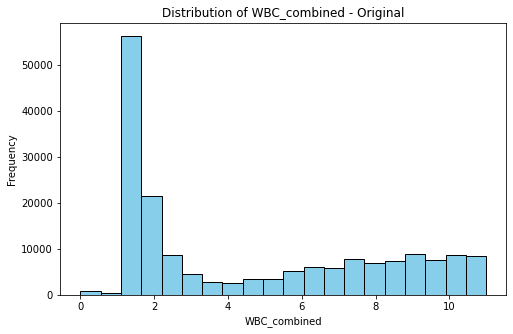

In [210]:
original_data = chartevents_wbc_df['WBC_combined'].tolist()
# original_data = [value for value in original_data if value > 100]

plt.figure(figsize=(8, 5))
plt.hist(original_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of WBC_combined - Original')
plt.xlabel('WBC_combined')
plt.ylabel('Frequency')
plt.show()

In [211]:
def merge_white_blood_cell_count_to_subgroup(wbc_df, subgroup_df):
    wbc_df['charttime'] = pd.to_datetime(wbc_df['charttime'])

    if 'level_0' in subgroup_df.columns:
        subgroup_df = subgroup_df.drop('level_0', axis=1)
        
    subgroup_df.reset_index(inplace=True)

    filtered_wbc_df = wbc_df[(wbc_df['subject_id'].isin(subgroup_df['subject_id'])) & (wbc_df['hadm_id'].isin(subgroup_df['hadm_id']))]

    merged_df = pd.merge(subgroup_df[['subject_id', 'rounded_age', 'admission_type_encoded', 'subgroup', 'hadm_id']],
                        filtered_wbc_df[['subject_id', 'hadm_id', 'icustay_id', 'WBC_combined', 'charttime']],
                        on=['subject_id', 'hadm_id'], how='outer')
    return merged_df


In [212]:
subgroup_1_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_1_df)
subgroup_2_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_2_df)
subgroup_3_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_3_df)
subgroup_4_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_4_df)
subgroup_5_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_5_df)
subgroup_6_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_6_df)
subgroup_7_wbc_df = merge_white_blood_cell_count_to_subgroup(chartevents_wbc_df, subgroup_7_df)

In [213]:
import pandas as pd

wbc_dfs = [subgroup_1_wbc_df, subgroup_2_wbc_df, subgroup_3_wbc_df, subgroup_4_wbc_df, subgroup_5_wbc_df, subgroup_6_wbc_df, subgroup_7_wbc_df]

def calculate_stats(df):
    return df['WBC_combined'].agg({
        'mean': 'mean',
        'max': 'max',
        'mode': lambda x: x.mode().iloc[0],
        'std': 'std',
        'median': 'median'
    })

wbc_stats_list = []

for i, df in enumerate(wbc_dfs):
    subgroup_stats = calculate_stats(df)
    wbc_stats_list.append(subgroup_stats)

result_wbc_df = pd.DataFrame(wbc_stats_list, index=[f'Subgroup {i + 1}' for i in range(len(wbc_dfs))])

result_wbc_df.loc['Original Chartevents'] = calculate_stats(chartevents_wbc_df)

result_wbc_df = result_wbc_df.transpose()

result_wbc_df.round(2)


,Subgroup 1,Subgroup 2,Subgroup 3,Subgroup 4,Subgroup 5,Subgroup 6,Subgroup 7,Original Chartevents
mean,4.77,4.53,4.66,4.77,4.60,4.67,4.58,4.64
max,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mode,1.19,10.70,6.80,9.50,9.80,1.12,9.40,9.40
std,3.42,3.38,3.13,3.44,3.55,3.45,3.44,3.45
median,3.82,2.77,3.90,3.49,2.37,2.82,2.72,2.85


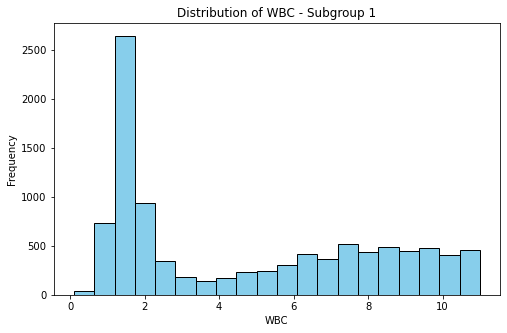

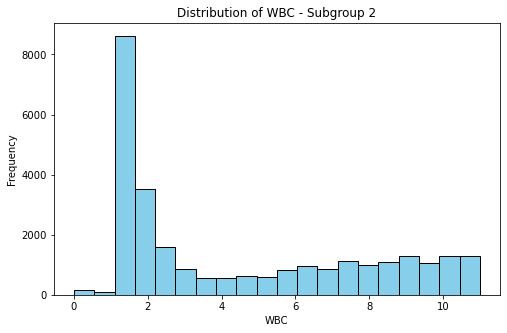

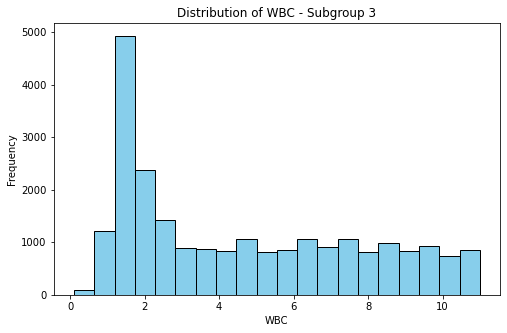

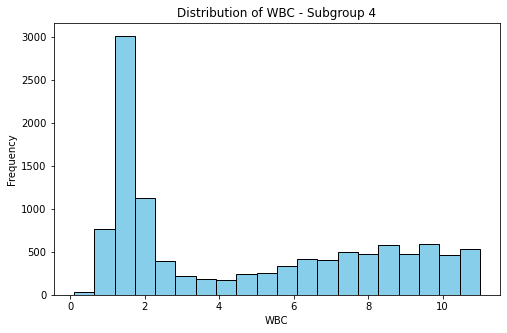

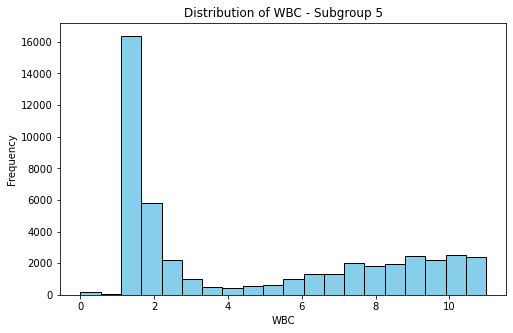

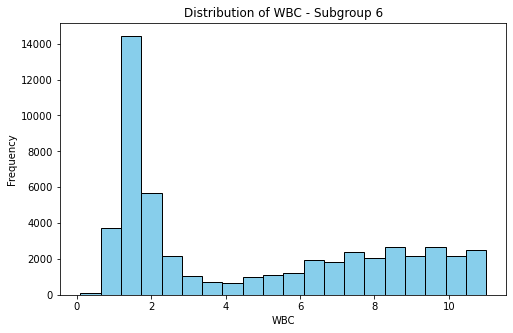

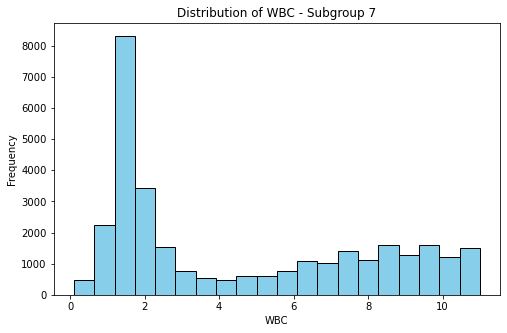

In [214]:
subgroups = [subgroup_1_wbc_df, subgroup_2_wbc_df, subgroup_3_wbc_df,
             subgroup_4_wbc_df, subgroup_5_wbc_df, subgroup_6_wbc_df, subgroup_7_wbc_df]

for i, subgroup_df in enumerate(subgroups):
    filtered_data = subgroup_df['WBC_combined'].dropna().tolist()
   
    plt.figure(figsize=(8, 5))
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of WBC - Subgroup {i + 1}')
    plt.xlabel('WBC')
    plt.ylabel('Frequency')
    plt.show()